In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [3]:
df_2022 = pd.read_csv("C:/Data/Nash_Heat_Map/LSTandNDVI2022.csv")

In [4]:
df_2022.head()

,OBJECTID,LST10,ndvi
0,1,70.508446,0.409294
1,2,70.223480,0.494073
2,3,70.642418,0.523827
3,4,70.406158,0.494177
4,5,73.789093,0.361294


In [5]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17400 entries, 0 to 17399
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   OBJECTID  17400 non-null  int64  
 1   LST10     17400 non-null  float64
 2   ndvi      17400 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 407.9 KB


In [18]:
#this new dataframe removes all rows with ndvi values that correspond with water or clouds
df_2022_nw = df_2022[(df_2022['ndvi']>0)]

In [7]:
df_2022_nw.shape

(17074, 3)

<AxesSubplot:xlabel='ndvi', ylabel='LST10'>

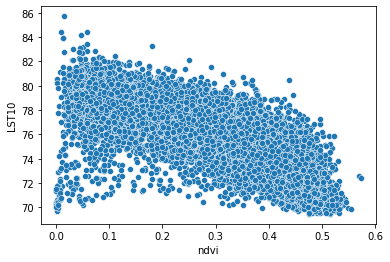

In [8]:
sns.scatterplot(data = df_2022_nw, x='ndvi', y='LST10')

<AxesSubplot:>

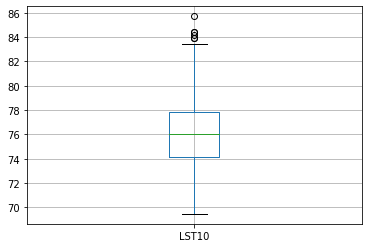

In [27]:
df_2022_nw.boxplot(column = ['LST10'])

In [10]:
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls

In [11]:
index_list = []
for feature in ['LST10']:
    index_list.extend(outliers(df_2022_nw, 'LST10'))

In [12]:
index_list

[8118, 8142, 10821, 16620, 16640, 16653]

In [13]:
def remove (df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [14]:
df_2022_cleaned = remove(df_2022_nw, index_list)

<AxesSubplot:>

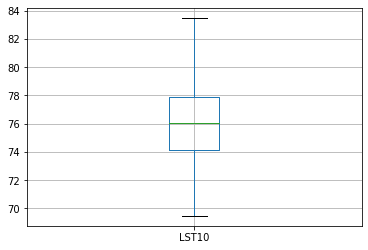

In [15]:
df_2022_cleaned.boxplot(column = ['LST10'])

In [16]:
y = df_2022_cleaned['LST10']
x = df_2022_cleaned[['ndvi']]
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  LST10   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                 2.519e+04
Date:                Mon, 25 Jul 2022   Prob (F-statistic):               0.00
Time:                        22:42:06   Log-Likelihood:                -33127.
No. Observations:               17068   AIC:                         6.626e+04
Df Residuals:                   17066   BIC:                         6.627e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.6810      0.033   2434.672      0.0

In [19]:
#this second dataframe uses a new set of random points from the same ArcGIS layers
df_2022_2 = pd.read_csv('C:/Data/Nash_Heat_Map/LSTandNDVI2022_2.csv')

In [21]:
df_2022_2.head()

,OID,CID,LST10,ndvi
0,0,1,71.507599,0.373241
1,1,1,73.111504,0.492512
2,2,1,76.764198,0.145602
3,3,1,69.406799,0.496129
4,4,1,71.719101,0.423441


In [22]:
df_2022_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17400 entries, 0 to 17399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   OID     17400 non-null  int64  
 1   CID     17400 non-null  int64  
 2   LST10   17400 non-null  float64
 3   ndvi    17400 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 543.9 KB


In [23]:
df_2022_2_nw = df_2022_2[(df_2022_2['ndvi']>0)]

In [24]:
df_2022_2_nw.shape

(17091, 4)

<AxesSubplot:xlabel='ndvi', ylabel='LST10'>

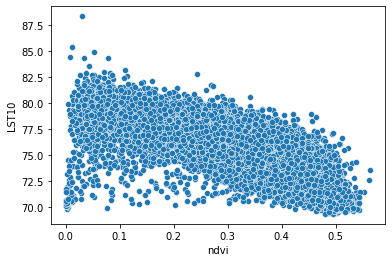

In [25]:
sns.scatterplot(data = df_2022_2_nw, x='ndvi', y='LST10')

<AxesSubplot:>

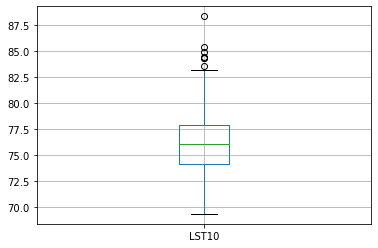

In [26]:
df_2022_2_nw.boxplot(column = ['LST10'])

In [33]:
index_list = []
for feature in ['LST10']:
    index_list.extend(outliers(df_2022_2_nw, 'LST10'))

In [34]:
index_list

[989, 2730, 6023, 6045, 8123, 16626, 16686]

In [35]:
df_2022_2_cleaned = remove(df_2022_2_nw, index_list)

<AxesSubplot:>

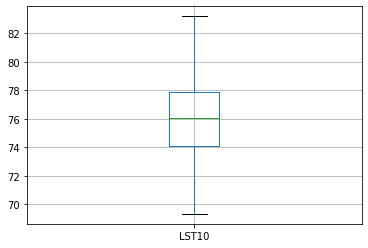

In [36]:
df_2022_2_cleaned.boxplot(column = ['LST10'])

In [37]:
y = df_2022_2_cleaned['LST10']
x = df_2022_2_cleaned[['ndvi']]
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  LST10   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                 2.502e+04
Date:                Mon, 25 Jul 2022   Prob (F-statistic):               0.00
Time:                        22:51:10   Log-Likelihood:                -33324.
No. Observations:               17084   AIC:                         6.665e+04
Df Residuals:                   17082   BIC:                         6.667e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.6865      0.033   2429.781      0.0

In [38]:
#the R-squared values for the correlation between NDVI and land surface temperature in the two dataframes are 0.596 and 0.594

In [40]:
#this dataframe draws from the same NDVI and land surface temperature values, 
#but it also includes census data on the percentage of residents living below the poverty line
df_2022_bpl = pd.read_csv('C:/Data/Nash_Heat_Map/LST_NDVI_Pov_2022.csv')

In [41]:
df_2022_bpl.head()

,OBJECTID,CID,ndvi,LST10,Perc_Below_PL
0,1,1,0.226993,71.786598,8.0
1,2,1,0.433407,70.027336,8.0
2,3,1,0.325087,70.578987,8.0
3,4,1,0.441644,71.750923,8.0
4,5,1,0.433368,70.190506,8.0


In [42]:
df_2022_bpl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17400 entries, 0 to 17399
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OBJECTID       17400 non-null  int64  
 1   CID            17400 non-null  int64  
 2   ndvi           17400 non-null  float64
 3   LST10          17400 non-null  float64
 4   Perc_Below_PL  17058 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 679.8 KB


In [44]:
#remove all rows that have a null value for Perc_Below_PL
df_2022_bpl = df_2022_bpl.dropna()

In [45]:
df_2022_bpl.shape

(17058, 5)

In [46]:
df_2022_bpl_nw = df_2022_bpl[(df_2022_bpl['ndvi']>0)]

In [47]:
df_2022_bpl_nw.shape

(17048, 5)

In [53]:
def classifier_2(row):
    if row['Perc_Below_PL'] <= 25:
        return '0 - 25%'
    elif row['Perc_Below_PL'] <= 50:
        return '26 - 50%'
    elif row['Perc_Below_PL'] <= 75:
        return '51 - 75%'
    else:
        return '76 - 100%'

In [55]:
df_2022_bpl_nw['Perc_Below_PL_Classified'] = df_2022_bpl_nw.apply(classifier_2, axis = 1)

C:\Users\there\AppData\Local\Temp\ipykernel_34012\460794010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_bpl_nw['Perc_Below_PL_Classified'] = df_2022_bpl_nw.apply(classifier_2, axis = 1)


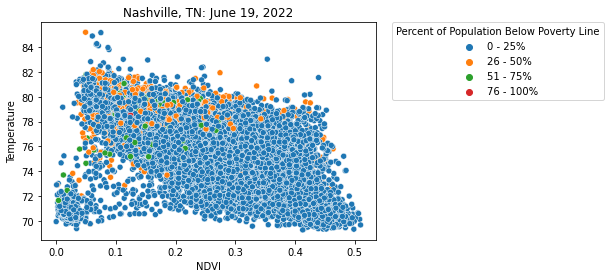

In [72]:
sns.scatterplot(data = df_2022_bpl_nw, x='ndvi', y='LST10', hue = 'Perc_Below_PL_Classified')
plt.title('Nashville, TN: June 19, 2022')
plt.xlabel('NDVI')
plt.ylabel('Temperature')
plt.legend(title = 'Percent of Population Below Poverty Line', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [83]:
df_2022_bpl_nw.rename(columns = {'Perc_Below_PL_Classified' : 'Percent Poverty', 'ndvi' : 'NDVI', 'LST10' : 'LST'}, inplace = True)
df_2022_bpl_nw.groupby(['Percent Poverty']).mean('LST').drop(columns=['OBJECTID', 'CID', 'Perc_Below_PL'])

C:\Users\there\AppData\Local\Temp\ipykernel_34012\532301618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_bpl_nw.rename(columns = {'Perc_Below_PL_Classified' : 'Percent Poverty', 'ndvi' : 'NDVI', 'LST10' : 'LST'}, inplace = True)


,NDVI,LST
Percent Poverty,,
0 - 25%,0.262821,75.430199
26 - 50%,0.209708,77.700750
51 - 75%,0.112802,78.848010
76 - 100%,0.164952,79.159331
